<h1>Zomato Data Analysis</h1>

<h3>Data Dictionary</h3>
url	- Zomato Url of the restaurant<br>
address	- Address of the restaurant<br>
name - Name of the restaurant<br>	
online_order - Do they accept online order?<br>	
book_table - Do they have an option to book_table?<br>	
rate - Zomato rating<br>
votes - Votes<br>	
phone - Phone no.<br>	
location - Area<br>	
rest_type - Restaurant type<br>	
dish_liked - Most liked dish<br>	
cuisines - Type of Cuisines<br>	
approx_cost(for two people) - Approx. Cost<br>
reviews_list - Reviews<br>	
menu_item - Menu items<br>	
listed_in(type)	- Listed in type<br>
listed_in(city) - Listed in City<br>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv(r"/Users/jaiagrawal/Downloads/zomato.csv")
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [6]:
df.duplicated().sum()

0

In [7]:
#dropping nominal columns
df = df.drop(columns=['url','address','phone','location','menu_item','reviews_list','dish_liked'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   rest_type                    51490 non-null  object
 6   cuisines                     51672 non-null  object
 7   approx_cost(for two people)  51371 non-null  object
 8   listed_in(type)              51717 non-null  object
 9   listed_in(city)              51717 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB


In [8]:
#missing values

df.nunique()
df['rate'].value_counts()

rate
NEW       2208
3.9/5     2098
3.8/5     2022
3.7/5     2011
3.9 /5    1874
          ... 
2.2 /5       7
2.0 /5       7
2.0/5        4
1.8 /5       3
1.8/5        2
Name: count, Length: 64, dtype: int64

In [9]:
#whereever rate is NEW we replace it with NaN
df['rate']=df['rate'].apply(lambda x:np.nan if x=='NEW' else x)



In [10]:
df.info()
df = df.dropna(subset=['rest_type','cuisines','approx_cost(for two people)'])
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         41734 non-null  object
 4   votes                        51717 non-null  int64 
 5   rest_type                    51490 non-null  object
 6   cuisines                     51672 non-null  object
 7   approx_cost(for two people)  51371 non-null  object
 8   listed_in(type)              51717 non-null  object
 9   listed_in(city)              51717 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB


name                              0
online_order                      0
book_table                        0
rate                           9820
votes                             0
rest_type                         0
cuisines                          0
approx_cost(for two people)       0
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51148 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51148 non-null  object
 1   online_order                 51148 non-null  object
 2   book_table                   51148 non-null  object
 3   rate                         41328 non-null  object
 4   votes                        51148 non-null  int64 
 5   rest_type                    51148 non-null  object
 6   cuisines                     51148 non-null  object
 7   approx_cost(for two people)  51148 non-null  object
 8   listed_in(type)              51148 non-null  object
 9   listed_in(city)              51148 non-null  object
dtypes: int64(1), object(9)
memory usage: 4.3+ MB


In [12]:
df['rate'] = df['rate'].str.split('/').str[0]
df['rate'] = pd.to_numeric(df['rate'],errors='coerce')

In [13]:

df['approx_cost(for two people)']=df['approx_cost(for two people)'].str.replace(",","",regex=True).astype(int)

In [14]:
df['rate']=df['rate'].fillna(df['rate'].mean())

In [15]:
df.head(20)

,name,online_order,book_table,rate,votes,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari
5,Timepass Dinner,Yes,No,3.8,286,Casual Dining,North Indian,600,Buffet,Banashankari
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,Casual Dining,"North Indian, South Indian, Andhra, Chinese",800,Buffet,Banashankari
7,Onesta,Yes,Yes,4.6,2556,"Casual Dining, Cafe","Pizza, Cafe, Italian",600,Cafes,Banashankari
8,Penthouse Cafe,Yes,No,4.0,324,Cafe,"Cafe, Italian, Continental",700,Cafes,Banashankari
9,Smacznego,Yes,No,4.2,504,Cafe,"Cafe, Mexican, Italian, Momos, Beverages",550,Cafes,Banashankari


In [16]:
df['rest_type'].nunique()

93

In [17]:
#we will create top 9 categories and put the rest in others
top_9_categories = df['rest_type'].value_counts().nlargest(9).index
df['rest_type']=df['rest_type'].apply(lambda x: x if x in top_9_categories else 'Other')
df['rest_type'].value_counts()

rest_type
Quick Bites           19046
Casual Dining         10273
Other                  8163
Cafe                   3687
Delivery               2578
Dessert Parlor         2245
Takeaway, Delivery     2014
Bakery                 1141
Casual Dining, Bar     1136
Beverage Shop           865
Name: count, dtype: int64

In [18]:
top_9_Categories= df['cuisines'].value_counts().nlargest(9).index
df['cuisines']=df['cuisines'].apply(lambda x: x if x in top_9_Categories else 'Other')
df['cuisines'].value_counts()

cuisines
Other                                  39300
North Indian                            2858
North Indian, Chinese                   2355
South Indian                            1822
Biryani                                  906
Bakery, Desserts                         899
Fast Food                                798
Desserts                                 760
Cafe                                     726
South Indian, North Indian, Chinese      724
Name: count, dtype: int64

In [19]:
top_9_Categories= df['listed_in(city)'].value_counts().nlargest(9).index
df['listed_in(city)']=df['listed_in(city)'].apply(lambda x: x if x in top_9_Categories else 'Other')
df['listed_in(city)'].value_counts()

listed_in(city)
Other                    28770
BTM                       3252
Koramangala 7th Block     2904
Koramangala 5th Block     2803
Koramangala 4th Block     2744
Koramangala 6th Block     2589
Jayanagar                 2357
JP Nagar                  2073
Indiranagar               1838
Church Street             1818
Name: count, dtype: int64

In [20]:
df.head()

,name,online_order,book_table,rate,votes,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Casual Dining,Other,800,Buffet,Other
1,Spice Elephant,Yes,No,4.1,787,Casual Dining,Other,800,Buffet,Other
2,San Churro Cafe,Yes,No,3.8,918,Other,Other,800,Buffet,Other
3,Addhuri Udupi Bhojana,No,No,3.7,88,Quick Bites,Other,300,Buffet,Other
4,Grand Village,No,No,3.8,166,Casual Dining,Other,600,Buffet,Other


<h3>EDA</h3>

[Text(0, 0, '30311'), Text(0, 0, '20837')]

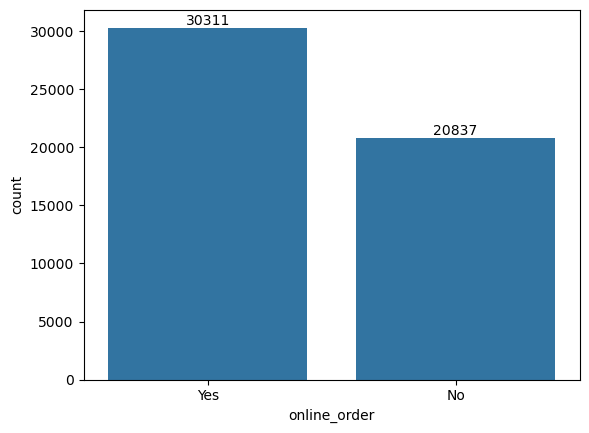

In [21]:
ax = sns.countplot(data=df,x='online_order')
ax.bar_label(ax.containers[0])

[Text(0, 0, '6449'), Text(0, 0, '44699')]

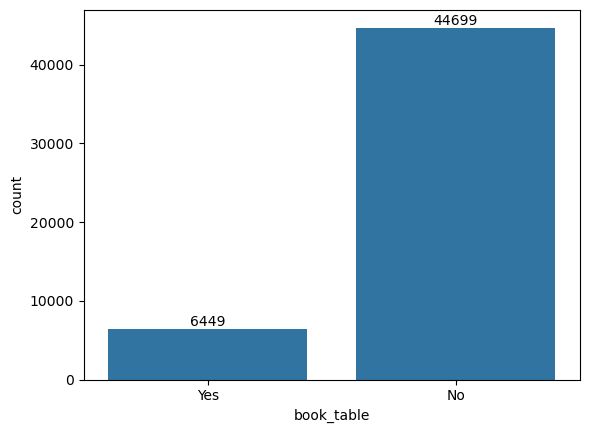

In [22]:
ax = sns.countplot(data=df,x='book_table')
ax.bar_label(ax.containers[0])

<Axes: >

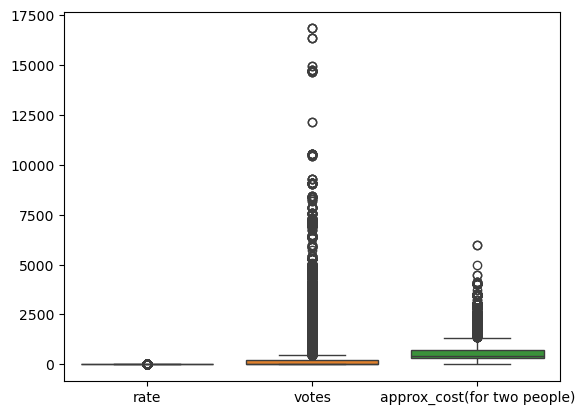

In [23]:
sns.boxplot(data=df)

In [25]:
from feature_engine.outliers import Winsorizer
x = Winsorizer(capping_method='iqr',tail='both',fold=1.5,variables=['rate','votes','approx_cost(for two people)'])
df = x.fit_transform(df)

<Axes: >

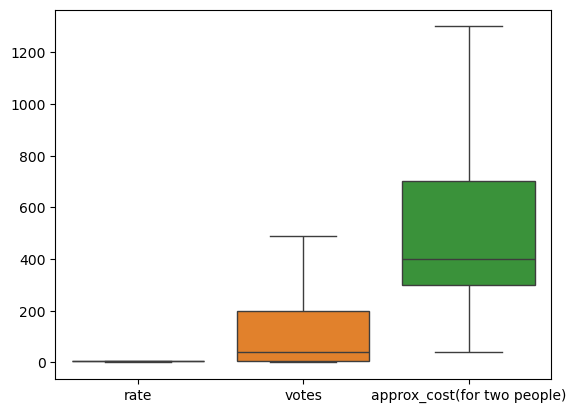

In [27]:
sns.boxplot(data=df)

<Axes: >

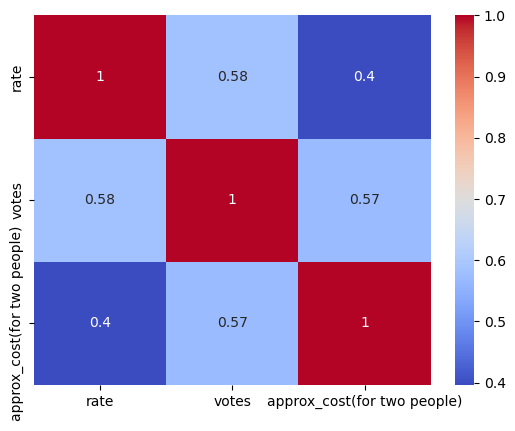

In [33]:
df1 = df[['rate','votes','approx_cost(for two people)']]
df1.corr()
sns.heatmap(data=df1.corr(),cmap="coolwarm",annot=True)

<Axes: xlabel='rest_type', ylabel='Count'>

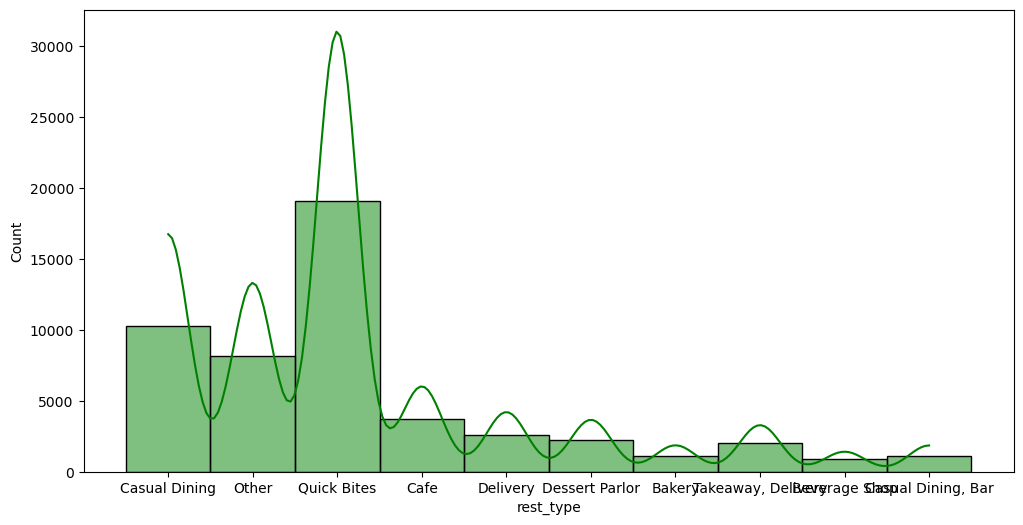

In [37]:
plt.figure(figsize=(12,6))
sns.histplot(data=df['rest_type'],kde=True,color="green",bins=10)


[Text(0, 0, '3252'),
 Text(0, 0, '1818'),
 Text(0, 0, '1838'),
 Text(0, 0, '2073'),
 Text(0, 0, '2357'),
 Text(0, 0, '2744'),
 Text(0, 0, '2803'),
 Text(0, 0, '2589'),
 Text(0, 0, '2904'),
 Text(0, 0, '28770')]

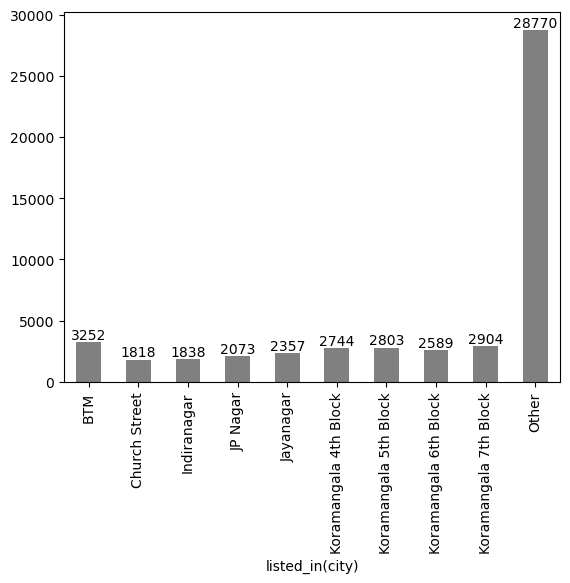

In [38]:
ax= df.groupby("listed_in(city)")['name'].count().plot(kind='bar',color='grey')
ax.bar_label(ax.containers[0])